In [1]:
# Use this dataset and the association rules mining to find new marketing plans. 

In [2]:
# try to do some visualization before applying the Apriori algorithm.

### importing labriries

In [3]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

#for preprocessing
from mlxtend.preprocessing import TransactionEncoder

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### the dataset

In [4]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

### Data Visualization

In [5]:
df = pd.DataFrame(dataset)

In [6]:
df.head()

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


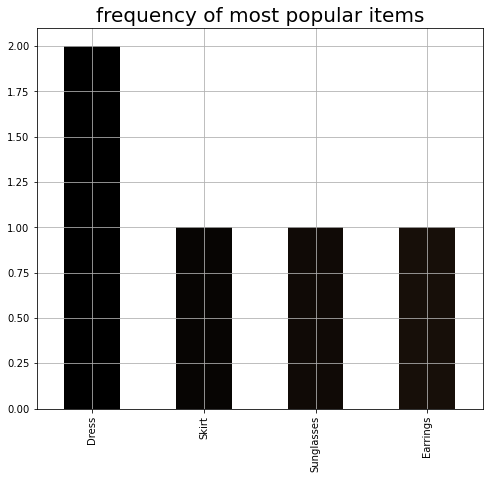

In [7]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (8, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [8]:
y = df[0].value_counts().head(20).to_frame()
y.index

Index(['Dress', 'Skirt', 'Sunglasses', 'Earrings'], dtype='object')

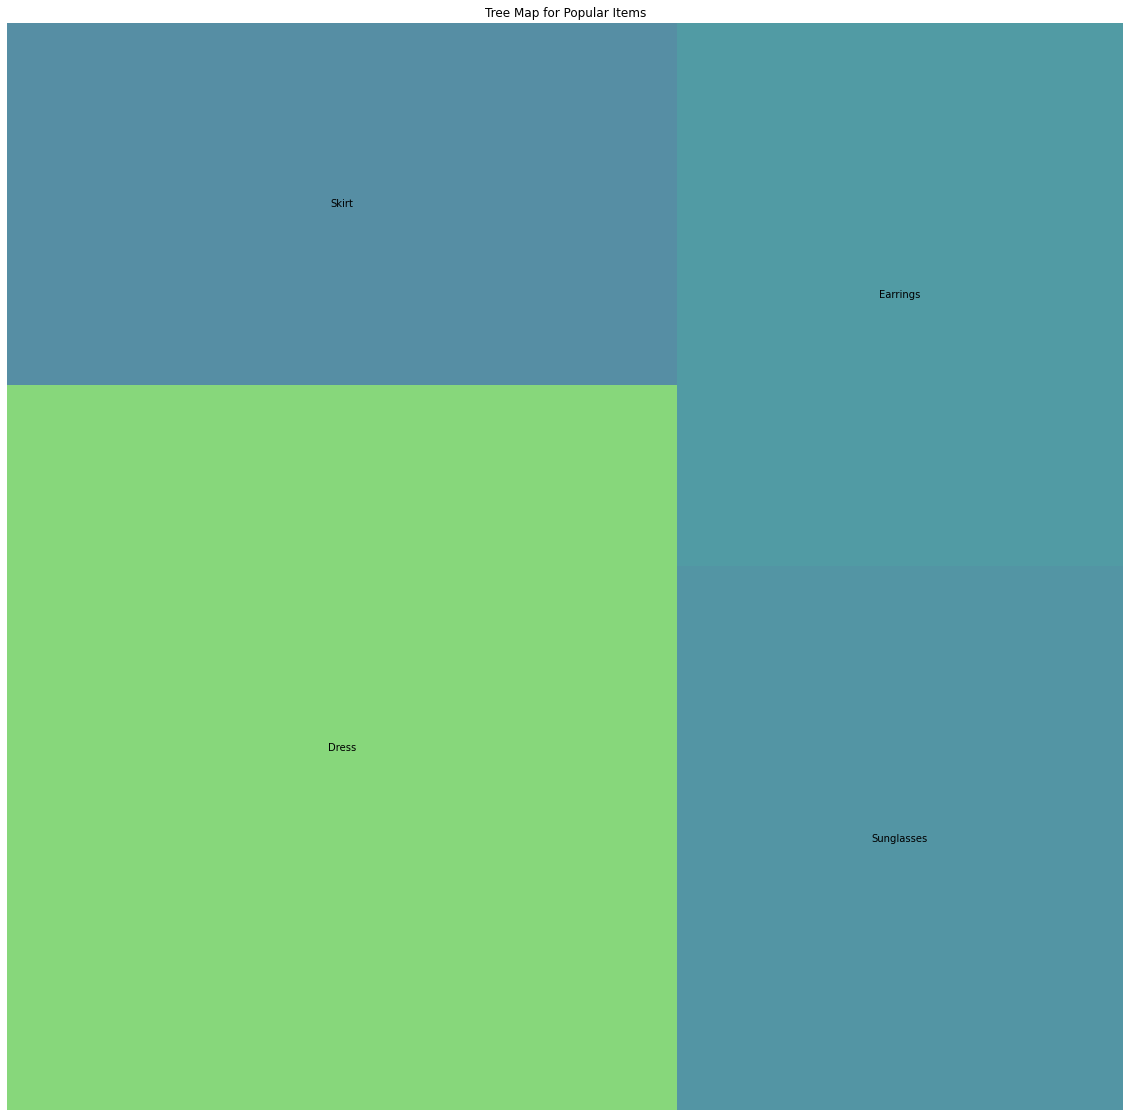

In [9]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
squarify.plot(sizes = y.values, label = y.index, alpha=.8)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [10]:
trans=np.array(dataset)

print(trans.shape)

(5,)


<ipython-input-10-0e91cf124863>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trans=np.array(dataset)


In [11]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(5, 12)

In [12]:
data.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


[Text(0, 0, 'Pants'),
 Text(1, 0, 'Scarf'),
 Text(2, 0, 'Hat'),
 Text(3, 0, 'Skirt'),
 Text(4, 0, 'Dress'),
 Text(5, 0, 'Earrings'),
 Text(6, 0, 'Heels'),
 Text(7, 0, 'Sneakers'),
 Text(8, 0, 'Necklace'),
 Text(9, 0, 'Sandals')]

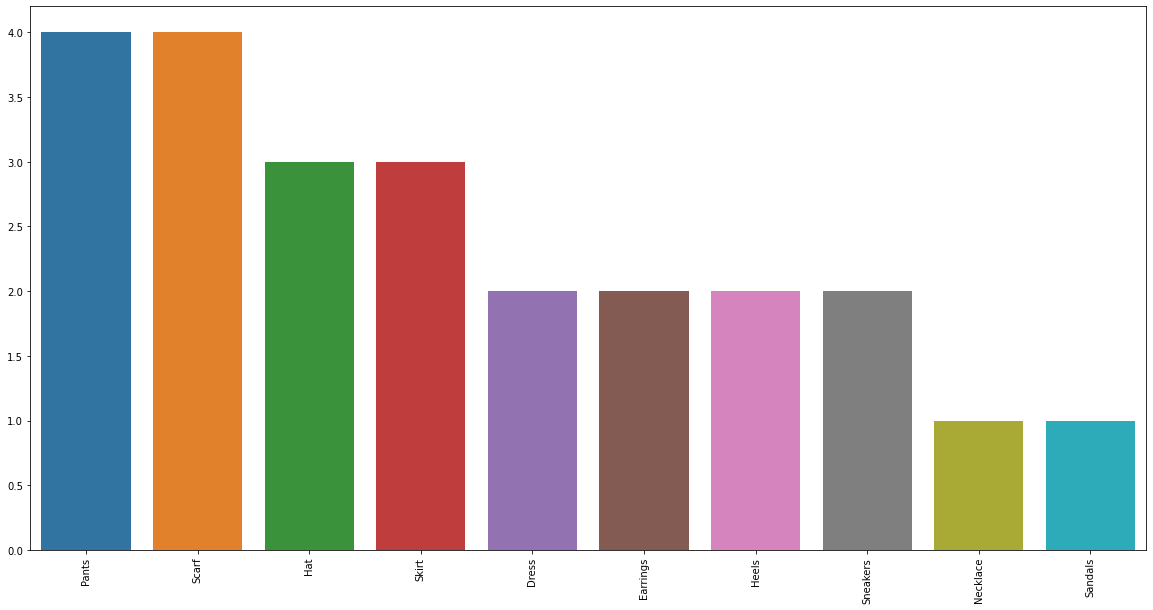

In [13]:
r=data.sum(axis=0).sort_values(ascending=False)[:10]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

In [14]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)


,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Heels, Hat, Scarf, Earrings, Necklace)"
147,0.2,"(Skirt, Scarf, Pants, Shirt, Earrings)"
148,0.2,"(Skirt, Hat, Scarf, Pants, Sneakers)"
149,0.2,"(Skirt, Hat, Pants, Sneakers, Sunglasses)"


In [15]:
# we use this dataframe in order to use its convenient features to filter the results

In [16]:
# For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via apriori and add a new column that stores the length of each itemset:

### Selecting and Filtering the Results

In [17]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4,(Dress),1
1,0.4,(Earrings),1
2,0.6,(Hat),1
3,0.4,(Heels),1
4,0.2,(Necklace),1
...,...,...,...
146,0.2,"(Heels, Hat, Scarf, Earrings, Necklace)",5
147,0.2,"(Skirt, Scarf, Pants, Shirt, Earrings)",5
148,0.2,"(Skirt, Hat, Scarf, Pants, Sneakers)",5
149,0.2,"(Skirt, Hat, Pants, Sneakers, Sunglasses)",5


In [18]:
# getting th item sets with length more or equals to 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
12,0.2,"(Dress, Earrings)",2
13,0.2,"(Hat, Dress)",2
14,0.4,"(Heels, Dress)",2
15,0.2,"(Necklace, Dress)",2
16,0.2,"(Dress, Pants)",2
...,...,...,...
146,0.2,"(Heels, Hat, Scarf, Earrings, Necklace)",5
147,0.2,"(Skirt, Scarf, Pants, Shirt, Earrings)",5
148,0.2,"(Skirt, Hat, Scarf, Pants, Sneakers)",5
149,0.2,"(Skirt, Hat, Pants, Sneakers, Sunglasses)",5


In [19]:
# getting th item sets with length = 1 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.4,(Dress),1
1,0.4,(Earrings),1
2,0.6,(Hat),1
3,0.4,(Heels),1
4,0.2,(Necklace),1
5,0.8,(Pants),1
6,0.2,(Sandals),1
7,0.8,(Scarf),1
8,0.2,(Shirt),1
9,0.6,(Skirt),1


In [20]:
# Apriori
freq_items = apriori(data, min_support = 0.1, use_colnames = True, verbose = 1)
freq_items.sort_values("support", ascending = False)

Processing 204 combinations | Sampling itemset size 6


,support,itemsets
5,0.8,(Pants)
7,0.8,(Scarf)
2,0.6,(Hat)
9,0.6,(Skirt)
39,0.6,"(Scarf, Pants)"
...,...,...
56,0.2,"(Heels, Hat, Dress)"
55,0.2,"(Scarf, Dress, Earrings)"
54,0.2,"(Necklace, Dress, Earrings)"
53,0.2,"(Heels, Dress, Earrings)"


### Support value gives us these information:
#### Head 5

* 80 percent of 100 purchases are "Pants" and "Scarf"
* 60 percent of 100 purchases are "Hat","Skirt","(Scarf, Pants)"

#### Tail 5

* 20 percent of 100 purchases are for the last 5 supositions : 
   - "(Heels, Dress, Hat)","(Scarf, Dress, Earrings)"
   - "(Necklace, Dress, Earrings)"
   - "(Dress, Earrings, Heels)"
   - "(Earrings, Scarf, Hat, Heels"
   - "Necklace, Dress)"

In [21]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Earrings),0.4,0.4,0.2,0.5,1.250000,0.04,1.2
1,(Earrings),(Dress),0.4,0.4,0.2,0.5,1.250000,0.04,1.2
2,(Dress),(Hat),0.4,0.6,0.2,0.5,0.833333,-0.04,0.8
3,(Heels),(Dress),0.4,0.4,0.4,1.0,2.500000,0.24,inf
4,(Dress),(Heels),0.4,0.4,0.4,1.0,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
1035,"(Necklace, Earrings)","(Heels, Hat, Scarf, Dress)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
1036,(Heels),"(Hat, Scarf, Dress, Earrings, Necklace)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
1037,(Dress),"(Heels, Hat, Scarf, Earrings, Necklace)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
1038,(Earrings),"(Heels, Hat, Scarf, Dress, Necklace)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6


* Antecedent support variable tells us probability of antecedent products alone
* Consequents support variable tells us probability of consequents products alone
* The support value is the value of the two products (Antecedents and Consequents)
* Confidence is an indication of how often the rule has been found to be true.
* The ratio of the observed support to that expected if X and Y were independent.

In [22]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
732,"(Necklace, Earrings)","(Heels, Hat, Dress)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
723,"(Heels, Hat)","(Necklace, Dress, Earrings)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
725,"(Heels, Earrings)","(Necklace, Hat, Dress)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
726,"(Necklace, Heels)","(Hat, Dress, Earrings)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
210,"(Skirt, Pants)",(Hat),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
213,(Hat),"(Skirt, Pants)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
218,(Hat),"(Sneakers, Pants)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
284,"(Skirt, Pants)",(Sneakers),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


#### Interpretation of the apriori algorithm association rule learning output:
* Each itemset representation has at least one rule matched the specified criteria of support > 1%, confidence > 10%, and lift > 1.

* From the top 5 matching rules evaluated on the support, confidence, and lift value, the itemset of (Earrings, Hat) are the most commonly purchased combination matched our requirement for confidence of 100% and lift = 5 >2.

* Based on the most common itemset of (Earrings, Hat)'s rule of (Earrings) -> ( Hat), the confidence of (Earrings) -> ( Hat) is 1 or 100%. This confidence implies that out of all the purchases that contain (Earrings)all these purchases also included (Hat).

* so, we can put them together



In [23]:
# Let's do the same checkpoint but with a bigger dataset!

### 1. Import Libraries:
in fact there are previously imported

### 2.Read the dataset

In [30]:
items_df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Market-Basket-Optimization/master/Market_Basket_Optimisation.csv", header = None)
items_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Visualize data

*  Here I decided to count all unique values through all columns and build some visualitions. E.g. if we have 5 'almonds' in first column, 3 'almonds' in second column etc, so, will have 8 'almonds' in totalin order to use it in our frequency plot

In [31]:
df_res = pd.DataFrame()
for i in range(len(items_df.columns)):
    df_res = df_res.append(items_df[i].value_counts())

In [32]:
df_res.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,tea,water spray,zucchini,napkins,asparagus
0,11.0,18.0,3.0,57.0,5.0,6.0,3.0,9.0,4.0,1.0,...,8.0,95.0,47.0,24.0,31.0,NaN,NaN,NaN,NaN,NaN
1,29.0,10.0,2.0,64.0,5.0,8.0,9.0,31.0,8.0,13.0,...,5.0,68.0,92.0,25.0,38.0,5.0,1.0,10.0,NaN,NaN
2,35.0,12.0,5.0,46.0,4.0,12.0,18.0,15.0,13.0,14.0,...,8.0,33.0,69.0,24.0,32.0,4.0,1.0,2.0,NaN,NaN
3,29.0,6.0,4.0,43.0,3.0,11.0,10.0,9.0,9.0,9.0,...,13.0,13.0,68.0,7.0,26.0,1.0,1.0,9.0,1.0,NaN
4,12.0,3.0,4.0,18.0,2.0,8.0,11.0,16.0,9.0,15.0,...,7.0,12.0,63.0,3.0,17.0,4.0,NaN,17.0,2.0,NaN


In [33]:
# we use sum () because we will calculate the frequency
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)

In [34]:
df_sum

mineral water    1788.0
eggs             1348.0
spaghetti        1306.0
french fries     1282.0
chocolate        1230.0
                  ...  
bramble            14.0
cream               7.0
napkins             5.0
water spray         3.0
 asparagus          1.0
Length: 120, dtype: float64

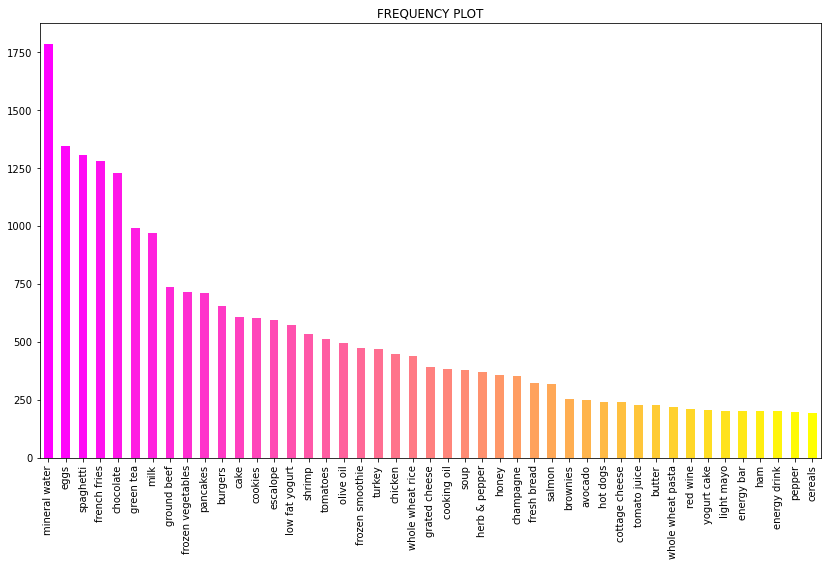

In [35]:
# After counting all values through all columns, we can build a frequency plot.
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

In [36]:
# Also we can  plot the frequency in the form of heat map

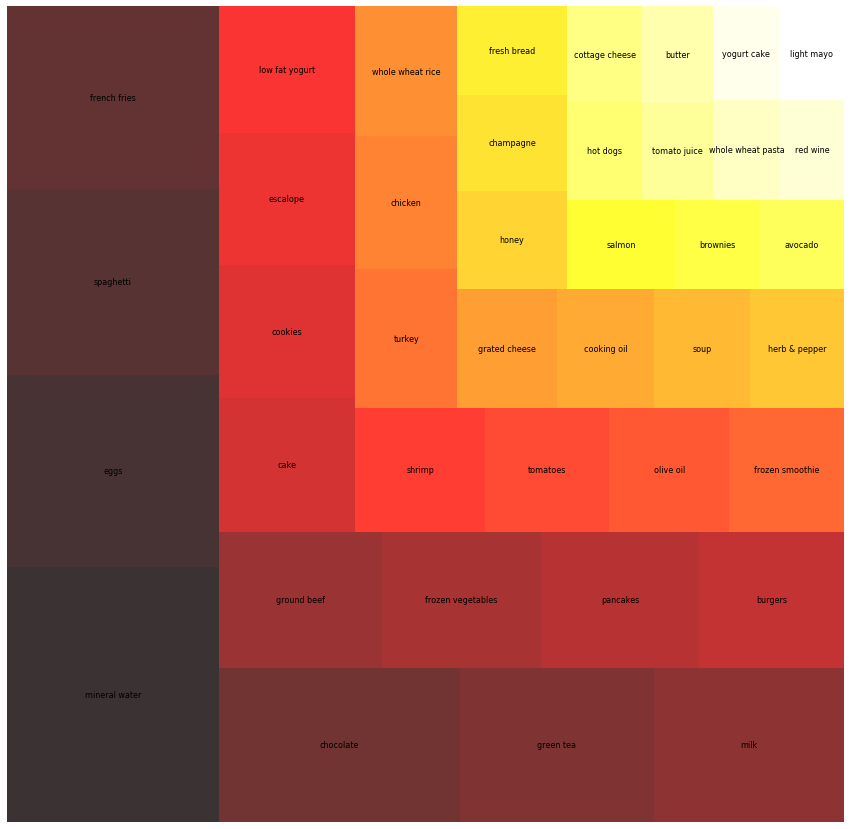

In [37]:
plt.figure(figsize=(15,15))
cnt = 40 # plot only first 'cnt' values
color = plt.cm.hot(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
squarify.plot(sizes = df_part.values, label = df_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

### 4. Transform data

In [38]:
### Before converting dataset to transaction view, we should convert pandas-data to list-data and then list-data to numpy-data.

In [39]:
# making each customers shopping items an identical list
arr = []
for i in range(items_df.shape[0]):
    arr.append([str(items_df.values[i,j]) for j in range(items_df.shape[1])])

arr = np.array(arr)
print(arr.shape)

(7501, 20)


In [40]:
# And now we can convert our dataset to transaction view.

In [41]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
print(data.shape)

(7501, 121)


In [42]:
# And then we can check the results of the transformation :

In [43]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [44]:
# As we can see, we have 'nan' column, so we should drop it

In [45]:
data = data.drop(columns=['nan'])
data.isnull().sum()

 asparagus           0
almonds              0
antioxydant juice    0
asparagus            0
avocado              0
                    ..
whole wheat pasta    0
whole wheat rice     0
yams                 0
yogurt cake          0
zucchini             0
Length: 120, dtype: int64

In [46]:
#  now no NaN values

In [47]:
# So, now we are going to use apriori rule to find some dependencies. Here you can read more about it.

In [48]:
freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, olive oil, mineral water)"


#### we can Notice that :
So, here we can see all rules, that have minimun support 0.01

In [49]:
# If we need rules with certain length, we can filter the results:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(ground beef, milk, mineral water)",3
253,0.017064,"(ground beef, spaghetti, mineral water)",3
254,0.015731,"(spaghetti, mineral water, milk)",3
255,0.010265,"(spaghetti, olive oil, mineral water)",3


In [50]:
filt = freq_rules['length'] > 1 # creating filter for filtering with certain condition
filtered_freq_rules = freq_rules.loc[filt] # applying filter
filtered_freq_rules # printing the filtering result

,support,itemsets,length
75,0.011598,"(avocado, mineral water)",2
76,0.011465,"(burgers, cake)",2
77,0.017064,"(burgers, chocolate)",2
78,0.028796,"(burgers, eggs)",2
79,0.021997,"(burgers, french fries)",2
...,...,...,...
252,0.011065,"(ground beef, milk, mineral water)",3
253,0.017064,"(ground beef, spaghetti, mineral water)",3
254,0.015731,"(spaghetti, mineral water, milk)",3
255,0.010265,"(spaghetti, olive oil, mineral water)",3


In [51]:
# Association Rules & Info
items_df_ar = association_rules(freq_rules, metric = "confidence", min_threshold = 0.5)
items_df_arss

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
1,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552


* From the top 5 matching rules evaluated on the support, confidence, and lift value, the itemset (eggs, ground beef)	of are the most commonly purchased combination matched our requirement for confidence of 50% and lift > 2.

* Based on the most common itemset of (eggs, ground beef)	's rule of (eggs)	 -> (ground beef), the confidence of (eggs) -> (ground beef) is 0.506667 or 50.66%. This confidence implies that out of all the purchases that contain (eggs), 50.66%. of the purchases also included ground beef.

* The lift of the most purchased item combination is 2.13 This indicates that groud beef is 2.13 times more likely to be bought by the customers who buy egg compared to the default likelihood of the sales of groud beef alone.

* so we can put them together